# Pandas Exercise One: Salaries

**Dataset Filename: salaries1.csv**

Complete the tasks outlined in bold below (Some tasks may have multiple solutions).
___

* **Import pandas as pd.**
* **Read salaries1.csv as a dataframe called df.**
* **Check the head of the dataframe.**

In [1]:
import pandas as pd
df = pd.read_csv('salaries1.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


* **Use the .info() method to display the number of entries.**

In [2]:
# 148654 Entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


* **Show the average/mean base pay.**

In [3]:
df['BasePay'].mean()

66325.4488404877

* **Show the highest amount of over time pay.**

In [4]:
df['OvertimePay'].max()

245131.88

* **Find the job title for the employee, TIFFANY IP.**

In [5]:
df[df['EmployeeName']=='tiffany ip'.upper()]['JobTitle']

18078    JUNIOR ENGINEER
Name: JobTitle, dtype: object

* **Find the amount of salary (including benefits) that the employee, tiffany ip receives.**

In [6]:
df[df['EmployeeName']=='tiffany ip'.upper()]['TotalPayBenefits']

18078    68216.33
Name: TotalPayBenefits, dtype: float64

* **Find the person who receives the highest amount of salary (including benefits).**

In [8]:
df[df['TotalPayBenefits']==df['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

* **Find the person who receives the lowest amount of salary (including benefits).** 

In [11]:
df[df['TotalPayBenefits']==df['TotalPayBenefits'].min()]['EmployeeName']

148653    Joe Lopez
Name: EmployeeName, dtype: object

* **Find the average (mean) base salary of all employees per year from 2011-2014.**

In [14]:
df.groupby('Year').mean('BasePay')['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

* **Find the number of unique job titles.**

In [15]:
df['JobTitle'].nunique()

2159

* **Find the top ten most common jobs.**

In [18]:
df['JobTitle'].value_counts().head(10)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

* **Find the number of job titles represented by only one person in 2013 (i.e. Job Titles with only one occurence in 2013).**

In [21]:
sum(df[df['Year']==2013]['JobTitle'].value_counts()==1)

202

* **Find the number of people with the word 'chief' in their job titles.**
    * In the dataset, there are job titles in both upper and lower cases. To take the cases into account, create a function to conditional boolean check the argument in .lower() and .split() (split the words in the job title into a list) and then, return a True or a False.
    * Next, apply the function as an inline lambda onto the job title column.

In [23]:
def abcd(n):
    if 'chief' in n.lower().split():
        return True
    else:
        return False

sum(df['JobTitle'].apply(lambda a: abcd(a)))

477

* **The .corr() Method: Correlation (See lecture ppt)**
    * Find the correlation between length of the job title string and salary.

In [25]:
df['TitleLength'] = df['JobTitle'].apply(len)
df['TitleLength']

0         46
1         31
2         31
3         36
4         44
          ..
148649     9
148650    12
148651    12
148652    12
148653    26
Name: TitleLength, Length: 148654, dtype: int64

In [31]:
df[['JobTitle', 'TitleLength']].corr(method='pearson', numeric_only=True)

,TitleLength
TitleLength,1.0


In [32]:
df[['TitleLength', 'TotalPayBenefits']].corr(numeric_only=True)

,TitleLength,TotalPayBenefits
TitleLength,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


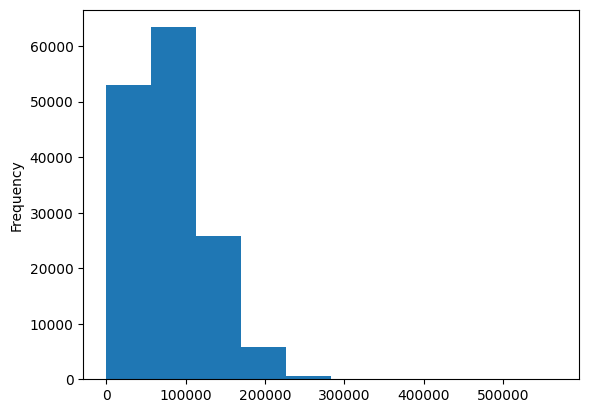

In [33]:
# Example Preview: MatPlotLib Histogram Method One
import matplotlib.pyplot as plt
df['TotalPay'].plot(kind = 'hist')
plt.show()

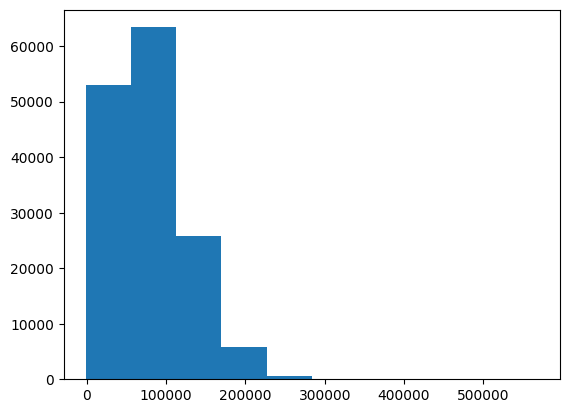

In [34]:
# Example Preview: MatPlotLib Histogram Method Two
import matplotlib.pyplot as plt
plt.hist(df['TotalPay'])
plt.show()